In [1]:
from qiskit import Aer, assemble
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.aqua.utils import tensorproduct
from qiskit_textbook.tools import vector2latex
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
men = [0, 1]
women = [0, 1]  # ["A", "B"]
# Demo example
# |  Pref   |   1st   |   2nd   |
# |  Man 0  | Woman A | Woman B |
# |  Man 1  | Woman A | Woman B |

# |  Pref   |   1st   |   2nd   |
# | Woman A |  Man 0  |  Man 1  |
# | Woman B |  Man 1  |  Man 0  |

# By a men-optimal Gale-Shapley Algorithm (classical), the stable matching would be:
# (Man 0, Woman A), (Man 1, Woman B)

# By a women-optimal Gale-Shapley Algorithm (classical), the stable matching would be:
# (Man 0, Woman A), (Man 1, Woman B)

In [3]:
def man_decision(man, decision_oracle, n_women=len(women)):
    grover_circuit = QuantumCircuit(int(np.log2(n_women)))  # each man is assigned log2(n_women) qubits
    grover_circuit = initialize_s(grover_circuit, [0])

    for i in range(int(np.sqrt((n_women)))):  # Grover Algorithm: repeat this step for sqrt(n_women) times
        grover_circuit.barrier()  # for visual separation
        grover_circuit = add_oracle(grover_circuit, 0, decision_oracle)
        grover_circuit.barrier()  # for visual separation
        grover_circuit = add_diffuser(grover_circuit, 0, decision_oracle)
    
    title = "Man_" + str(man)
    statevector, counts = simulation(grover_circuit, title)
    return statevector, counts

In [4]:
def woman_decision(woman, decision_oracle, n_men=len(men)):
    grover_circuit = QuantumCircuit(int(np.log2(n_men)))  # each woman is assigned log2(n_men) qubits
    grover_circuit = initialize_s(grover_circuit, [0])

    for i in range(int(np.sqrt((n_men)))):  # Grover Algorithm: repeat this step for sqrt(n_women) times
        grover_circuit.barrier()  # for visual separation
        grover_circuit = add_oracle(grover_circuit, 0, decision_oracle)
        grover_circuit.barrier()  # for visual separation
        grover_circuit = add_diffuser(grover_circuit, 0, decision_oracle)

    woman_identifier = "A" if woman == 0 else "B"
    title = "Woman_" + woman_identifier
    statevector, counts = simulation(grover_circuit, title)
    return statevector, counts

In [5]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)

    return qc

In [6]:
def show_circuit(qc, title):
    qc.draw(output="mpl")
    plt.title(title)
    plt.show()

In [7]:
def add_oracle(qc, qubit, oracle=None):
    if callable(oracle):
        qc = oracle(qc, qubit)
    return qc

In [8]:
def add_diffuser(qc, qubit, oracle=None):
    qc.h(qubit)
    qc = add_oracle(qc, qubit, oracle)
    qc.h(qubit)
    return qc

In [9]:
def simulation(qc, title=None):
    qc.measure_all()
    if title is not None:
        show_circuit(qc, title + " measured")
    sim = Aer.get_backend("aer_simulator")

    qc_sim = qc.copy()
    qc_sim.save_statevector()
    qobj = assemble(qc_sim)
    result = sim.run(qobj).result()

    statevector = result.get_statevector()
    counts = result.get_counts()
    # vector2latex(statevector, pretext="|\\psi\\rangle =")
    # plot_histogram(counts)

    return statevector, counts

In [10]:
def oracle_men(qc, qubit):
    qc.rz(pi, qubit)
    return qc

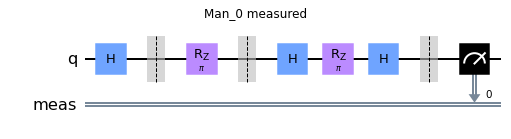

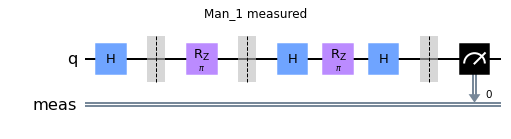

In [11]:
man0_sv, man0_count = man_decision(men[0], oracle_men)
man1_sv, man1_count = man_decision(men[1], oracle_men)
state_space_men = tensorproduct(man0_sv, man1_sv)  # state space of all men decision system

In [12]:
def oracle_womanA(qc, qubit):
    qc.rz(pi, qubit)
    return qc

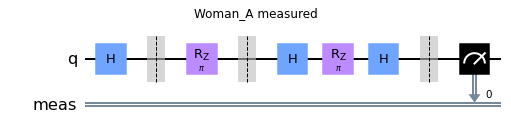

In [13]:
womanA_sv, womanA_count = woman_decision(women[0], oracle_womanA)

In [14]:
def oracle_womanB(qc, qubit):
    qc.z(qubit)
    return qc

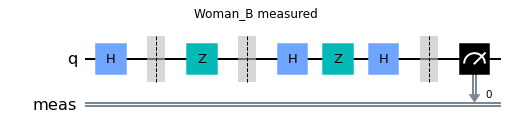

In [15]:
womanB_sv, womanB_count = woman_decision(women[1], oracle_womanB)
state_space_women = tensorproduct(womanA_sv, womanB_sv)  # women acceptances state space

In [16]:
couple_stability = tensorproduct(state_space_men, state_space_women)
print(couple_stability)

[ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j
  0.+0.00000000e+00j -0.+0.00000000e+00j -1.+9.79717439e-16j
  0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
  0.+0.00000000e+00j  0.+0.00000000e+00j -0.+0.00000000e+00j
  0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j
  0.+0.00000000e+00j]
